In [1]:
#import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
twitter = pd.read_csv("TweeML.csv")
twitter

,API,Key
0,consumerKey,N2upYHtmQRf3fHD7iddKacz4v
1,consumerSecret,P5KYc3rju5uICSnmvfjhpKlbgtldvZ09nYAwKxSoBRjV3A...
2,accessToken,1448664966911848462-V5faXyg5saDWL6z3SZbWh0Kg4R...
3,accessTokenSecret,dXCZZI6cwhmjgmRu6B30dmnuBiW7cvdyfbnZ78s9w4CSO


In [ ]:
#get the data
consumerKey = twitter['Key'][0]
consumerSecret = twitter['Key'][1]
accessToken = twitter['Key'][2]
accessTokenSecret = twitter['Key'][3]

In [ ]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#extract the 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "AccountVtu", count = 100, lang = "en", tweet_mode = "extended") 

#extract the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+ tweet.full_text + "\n")
    i = i + 1

Show the 5 recent tweets: 

1) RT @mla_sudhakar: Test positivity rate rises to 15% in the State as cases near 33k:
◾New cases in State: 32,793
◾New cases in B'lore: 22,28…

2) RT @mla_sudhakar: New cases cross 25k in Karnataka and 18k in Bengaluru:  
◾New cases in State: 25,005
◾New cases in B'lore: 18,374
◾Positi…

3) RT @mla_sudhakar: New cases cross 21k in Karnataka and 15k in Bengaluru:  
◾New cases in State: 21,390
◾New cases in B'lore: 15,617
◾Positi…

4) RT @STUDENTSDUNION: 🔸Tomorrow a national twitter campaign to support #VTU students will start at 10 am (12th Jan 2022).

🔸USE - #closevtuco…

5) RT @BSBommai: I have tested positive for COVID -19 today with mild symptoms. My health is fine, I am under home quarantine. I request every…



In [ ]:
#create a dataframe with a column called tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,RT @mla_sudhakar: Test positivity rate rises t...
1,RT @mla_sudhakar: New cases cross 25k in Karna...
2,RT @mla_sudhakar: New cases cross 21k in Karna...
3,RT @STUDENTSDUNION: 🔸Tomorrow a national twitt...
4,RT @BSBommai: I have tested positive for COVID...


In [ ]:
#clean the tweet
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+','', text)
  text = re.sub(r'https?:\/\/\S+','', text)
  
  return text
  
df['Tweets']= df['Tweets'].apply(cleanTxt)

df

,Tweets
0,_sudhakar: Test positivity rate rises to 15% i...
1,_sudhakar: New cases cross 25k in Karnataka an...
2,_sudhakar: New cases cross 21k in Karnataka an...
3,: 🔸Tomorrow a national twitter campaign to sup...
4,: I have tested positive for COVID -19 today w...
...,...
95,They took online classes whole semester!! And ...
96,Right to Education without loss of Right to Li...
97,: VTU Karnataka students object to offline exa...
98,: Ask every student to tweet there concerns a...


In [ ]:
#function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
#new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,_sudhakar: Test positivity rate rises to 15% i...,0.400000,0.100000
1,_sudhakar: New cases cross 25k in Karnataka an...,0.227273,0.068182
2,_sudhakar: New cases cross 21k in Karnataka an...,0.227273,0.068182
3,: 🔸Tomorrow a national twitter campaign to sup...,0.000000,0.000000
4,: I have tested positive for COVID -19 today w...,0.515152,0.325758
...,...,...,...
95,They took online classes whole semester!! And ...,0.250000,0.256250
96,Right to Education without loss of Right to Li...,0.535714,0.366071
97,: VTU Karnataka students object to offline exa...,0.400000,-0.100000
98,: Ask every student to tweet there concerns a...,0.000000,0.000000


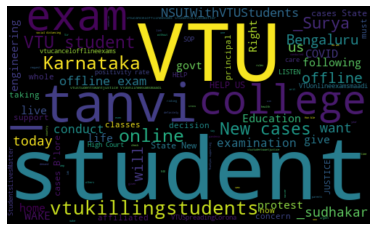

In [ ]:
#Plot the Word Cloud
allwords = ''.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'  

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,_sudhakar: Test positivity rate rises to 15% i...,0.400000,0.100000,Positive
1,_sudhakar: New cases cross 25k in Karnataka an...,0.227273,0.068182,Positive
2,_sudhakar: New cases cross 21k in Karnataka an...,0.227273,0.068182,Positive
3,: 🔸Tomorrow a national twitter campaign to sup...,0.000000,0.000000,Neutral
4,: I have tested positive for COVID -19 today w...,0.515152,0.325758,Positive
...,...,...,...,...
95,They took online classes whole semester!! And ...,0.250000,0.256250,Positive
96,Right to Education without loss of Right to Li...,0.535714,0.366071,Positive
97,: VTU Karnataka students object to offline exa...,0.400000,-0.100000,Negative
98,: Ask every student to tweet there concerns a...,0.000000,0.000000,Neutral


In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
     print(str(j) + ') '+sortedDF['Tweets'][i])
     print()
     j = j+1

1) _sudhakar: Test positivity rate rises to 15% in the State as cases near 33k:
◾New cases in State: 32,793
◾New cases in B'lore: 22,28…

2) _sudhakar: New cases cross 25k in Karnataka and 18k in Bengaluru:  
◾New cases in State: 25,005
◾New cases in B'lore: 18,374
◾Positi…

3) _sudhakar: New cases cross 21k in Karnataka and 15k in Bengaluru:  
◾New cases in State: 21,390
◾New cases in B'lore: 15,617
◾Positi…

4) : I have tested positive for COVID -19 today with mild symptoms. My health is fine, I am under home quarantine. I request every…

5) : Social distancing and ‘strictly’ adherence to “SOPs”. This is the reason why Vtu affiliated colleges are open(offline mo…

6) : If anything happens to any student is vtu responsible?. VTU should be fined for not following the government guideline…

7) : All exams should be postponed . Nothing important than life . Exponential surge in Covid cases is alarming 

8) _sudhakar: 8️⃣0️⃣% of adult population in Karnataka is now fully vaccinated with b

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
     print(str(j) + ') '+ sortedDF['Tweets'][i])
     print()
     j = j+1

1) Student's lives are not meant to be toyed with. This is outrageous.

TimesofIndia 
TheHindu 
OmicronVarient 
Omicron 
_kateel 
 
_sudhakar 
 

2) : When whole state is planning and forced to being locked then why the Vtu is not going to postpone 1st year exam …

3) : When these health workers are not safe even after taking vaccine shot then how can be the students?  …

4) : It's all because of  that students are being forced to protest in the midst of this deadly pandemic!! …

5) : It seems only Delhi and Maharashtra govt is serious about college students issue regarding exams rest others are least both…

6) : Vtu down down!!!! 
Today protest by  
vtu vtukillingstudents vtucancelofflineexams vtuspreadingcorona…

7) VTU time to bow down, and pay heed to the students demands!!
WE WANT JUSTICE!!
WE WANT JUSTICE!!
WE WANT JUSTICE!!
  _tanvi           

8) Students at BMS college of engineering, attending lab exams wearing masks! But no social distancing! And principal assure us that the

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
     print(str(j) + ') '+sortedDF['Tweets'][i])
     print()
     j = j+1

1) : 🔸Tomorrow a national twitter campaign to support VTU students will start at 10 am (12th Jan 2022).

🔸USE - closevtuco…

2) : Students dread offline classes and internals while COVID19 cases spike in campus. According to sources, students in t…

3) _jatti: Here’s what’s happening at VTU

In the last 3 days they’ve had over 6 contradicting circulars. Now, GoK has asked them to…

4)   

5) _sudhakar: Test positivity rate crosses 1️⃣0️⃣% in Bengaluru with the City recording 7,113 cases today.

Bengaluru continues to be t…

6) : Several school, college students across the country have been expressing concern over conduction of Offline exams amidst…

7) : This is just a digit for GOk bt it will lead a suicide for students
◾New cases in State:8,449
◾New cases in B'lore: 6,8…

8) : I am student of Galgotias college of engineering and technology 7 sem.I was having my exam on 5jan and after one day i tes…

9) _sudhakar: Positivity rate in Bengaluru goes up to 7.5% as cases cross 4k: 
◾New c

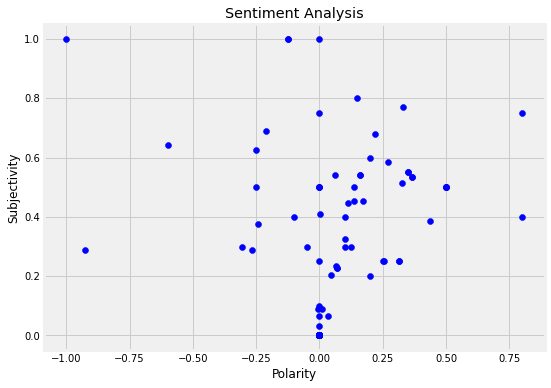

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show

In [ ]:
#percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

40.0

In [ ]:
#percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

14.0

<function matplotlib.pyplot.show>

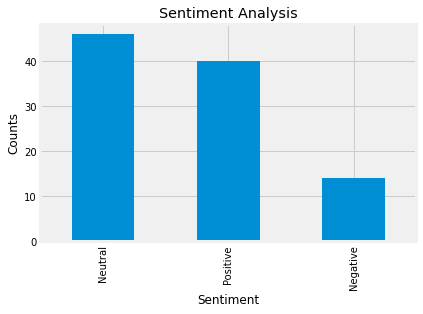

In [ ]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show